# Positivity Posts: Performance Forecast
Using Facebook Prophet, we will predict the performance of Positivity Posts based on 5 criteria: Impressions, URL Clicks, Likes, Retweets, Replies.

## Method
Facebook Prophet provides a model that can be trained on time series data in order to predict future outcomes. The Prophet object, requires a dataframe with a date column and a y (output) column. After plotting a forecast, it will detect and mark points of change in the plot.

## Steps
1. Clean/Re-label DataFrame and Isolate one criterion for the outcome column (i.e. "Impressions").
1. Instantiate Prophet Object (Model) with paramaters.
1. Train Model on historical DataFrame.
1. Produce Future DataFrame (future date inputs from which the Model will generate predictions).
1. Use Model to generate and plot predictions.
1. Show Changepoints (dashed lines indicate turning points in the time series).
1. Show components of forecast to better visualize the trend

### Import Dependencies

In [1]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Read Master CSV
goldie_df = pd.read_csv("goldie_master_cleaned_0314.csv")
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,2018-01-01 09:47:00+00:00,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,2018-01-02 18:11:00+00:00,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,2018-01-02 20:43:00+00:00,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,2018-01-03 00:51:00+00:00,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,2018-01-03 04:21:00+00:00,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11


In [3]:
#Changing Date/Time to "YYYY-MM-DD" format
goldie_df['year'] = pd.to_datetime(goldie_df['time']).dt.year.astype(str)
goldie_df['month'] = pd.to_datetime(goldie_df['time']).dt.month.astype(str)
goldie_df['day'] = pd.to_datetime(goldie_df['time']).dt.day.astype(str)

goldie_df['date'] = goldie_df[['year', 'month', 'day']].agg('-'.join, axis=1)
goldie_df = goldie_df.drop(columns = ["year", "month", "day"])
goldie_df = goldie_df.drop(columns = "time")

In [4]:
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6,2018-1-1
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-2
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-2
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7,2018-1-3
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11,2018-1-3


In [5]:
#Identify and Drop the Biggest Outlier
sample = goldie_df.sort_values(by=["impressions"], ascending=False)
sample.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
6258,6258,https://twitter.com/GoldieChan/status/11768922...,So excited that @Forbes shared my article on @...,1.0,608789.0,38345.0,0.062986,71.0,13.0,907.0,2077.0,753.0,0.0,459.0,0.0,1,34064,34064,2019-9-25
6779,6779,https://twitter.com/GoldieChan/status/11839781...,My next few 💚 talks &amp; livestreams:\n✨ #Vid...,2.0,283615.0,85.0,0.000300,11.0,1.0,22.0,10.0,0.0,1.0,11.0,0.0,0,491,29,2019-10-15
4798,4798,https://twitter.com/GoldieChan/status/11527092...,On a magical journey with #Funko Mira of @dark...,2.0,221055.0,6372.0,0.028825,42.0,3.0,339.0,172.0,80.0,18.0,230.0,0.0,0,5488,5488,2019-7-20
7426,7426,https://twitter.com/GoldieChan/status/11926178...,We’re on the red carpet for @OriginalFunko #Ho...,2.0,218574.0,3854.0,0.017632,16.0,11.0,216.0,387.0,17.0,55.0,268.0,0.0,0,2884,2884,2019-11-8
4797,4797,https://twitter.com/GoldieChan/status/11526773...,Always an absolute joy to collaborate with one...,2.0,209145.0,5912.0,0.028267,13.0,3.0,205.0,276.0,67.0,25.0,213.0,0.0,0,5110,5110,2019-7-20


In [6]:
goldie_df = goldie_df.drop([6258])

In [7]:
#Positivity DataFrame
postvty = goldie_df.copy()
postvty_df = postvty[postvty["Type"] == 3]
postvty_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-2
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7,2018-1-3
5,5,https://twitter.com/GoldieChan/status/94842598...,@QAllums YUSSSSS https://t.co/OHMxYAHZVQ,3.0,181.0,6.0,0.033149,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0,9,0,2018-1-3
7,7,https://twitter.com/GoldieChan/status/94896262...,Wooooowwww.... 10k followers on @LinkedIn and ...,3.0,642.0,32.0,0.049844,0.0,1.0,4.0,4.0,0.0,0.0,8.0,0.0,0,64,15,2018-1-4
9,9,https://twitter.com/GoldieChan/status/94969510...,What was your favorite toy growing up? A daily...,3.0,323.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-6


## Forecast Impression Data for Positivity Posts

In [8]:
#Positivity Impressions cleaned
postvty_impr_df = postvty_df[["date", "impressions"]]
postvty_impr_df = postvty_impr_df.rename(columns = {"date": "ds", "impressions": "y"})
postvty_impr_df.head()

,ds,y
1,2018-1-2,409.0
3,2018-1-3,465.0
5,2018-1-3,181.0
7,2018-1-4,642.0
9,2018-1-6,323.0


In [9]:
#Check for Outstanding Outliers
postvty_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
3173,2019-4-25,68038.0
6125,2019-9-19,38845.0
3032,2019-4-12,29360.0
9651,2020-2-5,28654.0
478,2018-4-25,26583.0


In [10]:
#Drop Outstanding Outliers to fix skew
# postvty_impr_df = postvty_impr_df.drop([8087])

In [11]:
#Check new df
postvty_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
3173,2019-4-25,68038.0
6125,2019-9-19,38845.0
3032,2019-4-12,29360.0
9651,2020-2-5,28654.0
478,2018-4-25,26583.0


#### Note on "changepoint_prior_scale" value when instantiating a Prophet model

``` 
m = Prophet(changepoint_prior_scale=0.05)
```

Default value is 0.05. The higher the value, the more flexible the model is which fits it closer to the historical data. As a result, the trend plot more closely resembles the prediction of the forecast plot, but the margin of error for prediction is wider. 

The lower the value, the less flexible the model is. This means the trend line is less fitted to the historical data. If the historical data has a net positive slope, the trend line produced will resemble a straight line with a positive slope without a margin of error.

Determining the value of "changepoint_prior_scale" has some arbitrary dimension based on client need.

Calibrate the value and check the trend line in the Forecast Components section below the prediction plot.

In [12]:
#Instantiate Prophet Class for Positivity-Impressions
m_postvty_impr = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.3)

In [13]:
#Train model on Impression Data for Positivity Posts
m_postvty_impr.fit(postvty_impr_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
#Generate 365 days into future for x-axis
future_postvty_impr = m_postvty_impr.make_future_dataframe(periods=365)
future_postvty_impr.tail()

,ds
2564,2021-02-24
2565,2021-02-25
2566,2021-02-26
2567,2021-02-27
2568,2021-02-28


In [15]:
#Predict Impressions of Positivity Posts for 1 Year
forecast_postvty_impr = m_postvty_impr.predict(future_postvty_impr)
forecast_postvty_impr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2564,2021-02-24,2280.775051,-1707.140125,6086.017950
2565,2021-02-25,2433.786693,-1500.076603,6187.715482
2566,2021-02-26,2278.833063,-1476.874744,6169.253233
2567,2021-02-27,2572.014117,-1172.584228,6341.005487
2568,2021-02-28,2397.455261,-1429.221510,6302.896243


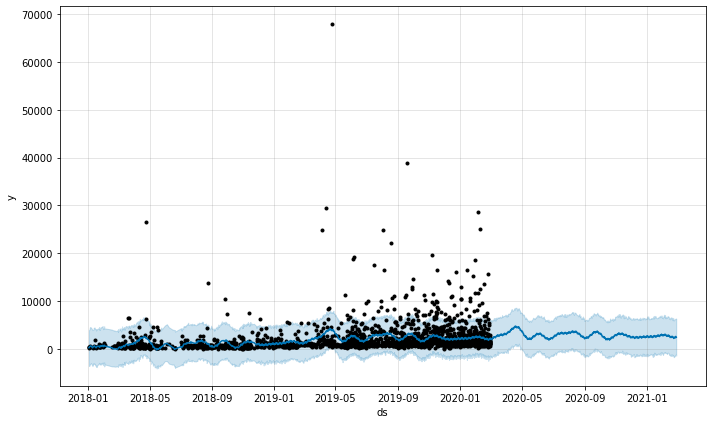

In [16]:
#Plot Forecast of Impressions for Positivity Posts
forecast_postvty_impr_plot = m_postvty_impr.plot(forecast_postvty_impr)

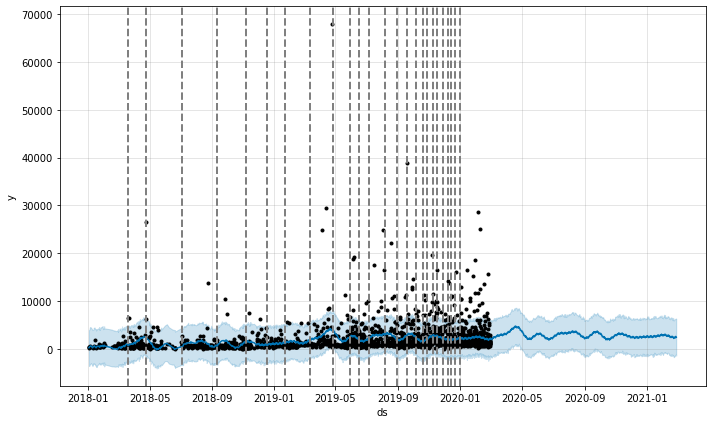

In [17]:
#Plot Changepoints
m_postvty_impr.plot(forecast_postvty_impr)
a = add_changepoints_to_plot(forecast_postvty_impr_plot.gca(), m_postvty_impr, forecast_postvty_impr)

for cp in m_postvty_impr.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

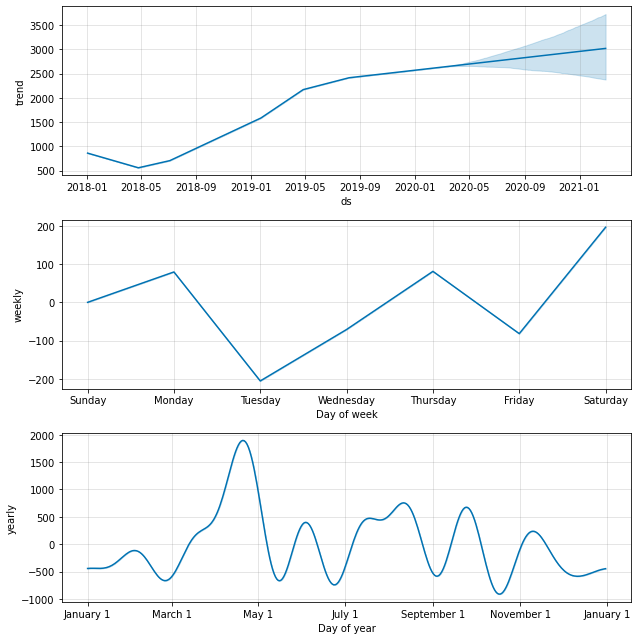

In [18]:
#Components of Forecast
forecast_postvty_impr_plot_2 = m_postvty_impr.plot_components(forecast_postvty_impr)


## Forecast Click Data for Positivity Posts

In [19]:
#Positivity Clicks DF
postvty_click_df = postvty_df[["date", "url clicks"]]
postvty_click_df.sort_values(by=["url clicks"], ascending=False)

,date,url clicks
5375,2019-8-19,42.0
478,2018-4-25,27.0
9727,2020-2-8,25.0
3526,2019-5-23,24.0
562,2018-5-3,22.0
...,...,...
4199,2019-6-20,0.0
4184,2019-6-20,0.0
4167,2019-6-19,0.0
4156,2019-6-19,0.0


In [20]:
#Positivity Clicks Cleaned
postvty_click_df = postvty_click_df.rename(columns = {"date": "ds", "url clicks": "y"})
postvty_click_df.head()

,ds,y
1,2018-1-2,0.0
3,2018-1-3,0.0
5,2018-1-3,0.0
7,2018-1-4,0.0
9,2018-1-6,0.0


In [21]:
#Instantiate Prophet Class for Positivity-Clicks
m_postvty_clicks = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.8)

In [22]:
#Train model on Click Data for Positivity
m_postvty_clicks.fit(postvty_click_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#Generate 365 days into future for x-axis
future_postvty_clicks = m_postvty_clicks.make_future_dataframe(periods=365)
future_postvty_clicks.tail()

,ds
2564,2021-02-24
2565,2021-02-25
2566,2021-02-26
2567,2021-02-27
2568,2021-02-28


In [24]:
#Predict Clicks of Positivity Posts for 1 Year
forecast_postvty_clicks = m_postvty_clicks.predict(future_postvty_clicks)
forecast_postvty_clicks[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2564,2021-02-24,2.022140,-3.202171,6.984021
2565,2021-02-25,1.969427,-3.374259,7.038903
2566,2021-02-26,1.948416,-3.231792,7.074120
2567,2021-02-27,2.419956,-3.064133,7.629442
2568,2021-02-28,1.930057,-3.537983,6.646044


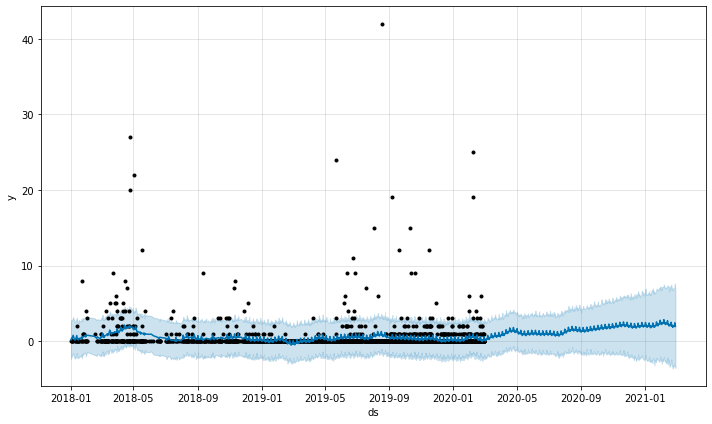

In [25]:
#Plot Forecast of Clicks for Positivity Posts
forecast_postvty_clicks_plot = m_postvty_clicks.plot(forecast_postvty_clicks)


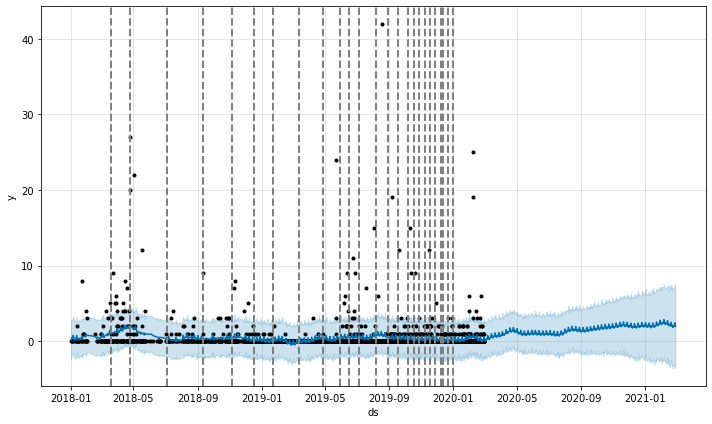

In [26]:
#Plot Changepoints
m_postvty_clicks.plot(forecast_postvty_clicks)
a = add_changepoints_to_plot(forecast_postvty_clicks_plot.gca(), m_postvty_clicks, forecast_postvty_clicks)

for cp in m_postvty_clicks.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

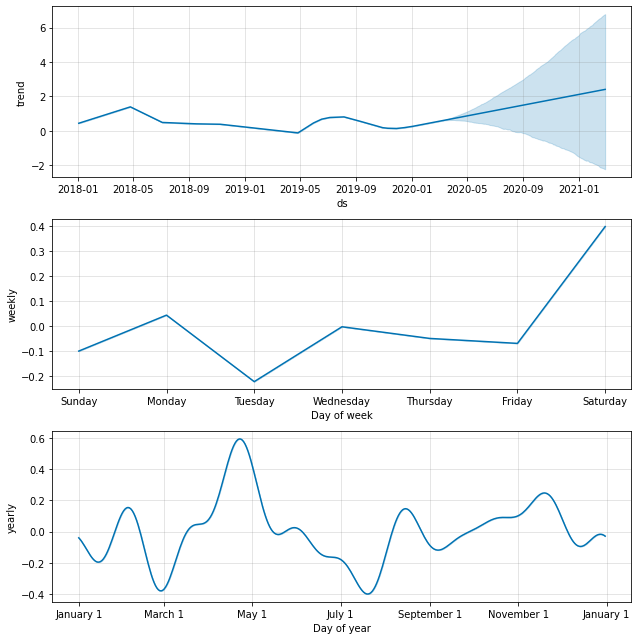

In [27]:
#Components of Forecast
forecast_postvty_clicks_plot_2 = m_postvty_clicks.plot_components(forecast_postvty_clicks)

## Forecast Retweet Data for Positivity Posts

In [28]:
#Create Data Frame for Retweet Data on Positivity Posts
postvty_retweet_df = postvty_df[["date", "retweets"]]
postvty_retweet_df.sort_values(by=["retweets"], ascending=False)

,date,retweets
3173,2019-4-25,97.0
9733,2020-2-9,73.0
3032,2019-4-12,45.0
7360,2019-11-7,43.0
9399,2020-1-26,38.0
...,...,...
7861,2019-11-18,0.0
7863,2019-11-18,0.0
2418,2019-1-31,0.0
4588,2019-7-9,0.0


In [29]:
#Positivity Retweets DF Cleaned
postvty_retweet_df = postvty_retweet_df.rename(columns = {"date": "ds", "retweets": "y"})
postvty_retweet_df.head()

,ds,y
1,2018-1-2,2.0
3,2018-1-3,0.0
5,2018-1-3,0.0
7,2018-1-4,0.0
9,2018-1-6,0.0


In [30]:
#Instantiate Prophet Class for Positivity-Retweets 
m_postvty_retweets = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.4)

In [31]:
#Train model on Retweet Data for Positivity
m_postvty_retweets.fit(postvty_retweet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#Generate 365 days into future for x-axis
future_postvty_retweets = m_postvty_retweets.make_future_dataframe(periods=365)
future_postvty_retweets.tail()

,ds
2564,2021-02-24
2565,2021-02-25
2566,2021-02-26
2567,2021-02-27
2568,2021-02-28


In [33]:
#Predict Retweets of Positivity Posts for 1 Year
forecast_postvty_retweets = m_postvty_retweets.predict(future_postvty_retweets)
forecast_postvty_retweets[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2564,2021-02-24,0.078148,-6.369363,6.142246
2565,2021-02-25,0.692857,-5.624881,7.018646
2566,2021-02-26,0.331468,-5.897275,6.785231
2567,2021-02-27,1.360516,-5.381638,7.764614
2568,2021-02-28,1.073559,-5.020714,6.991045


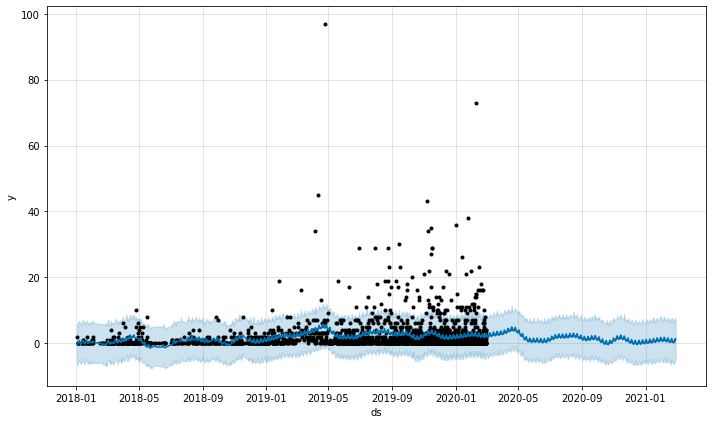

In [34]:
#Plot Forecast of Retweets for Promotional Posts
forecast_postvty_retweets_plot = m_postvty_retweets.plot(forecast_postvty_retweets)

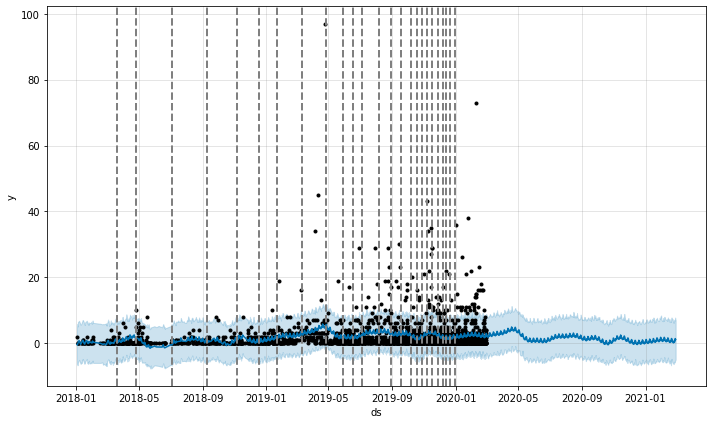

In [35]:
#Plot Changepoints
m_postvty_retweets.plot(forecast_postvty_retweets)
a = add_changepoints_to_plot(forecast_postvty_retweets_plot.gca(), m_postvty_retweets, forecast_postvty_retweets)

for cp in m_postvty_retweets.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

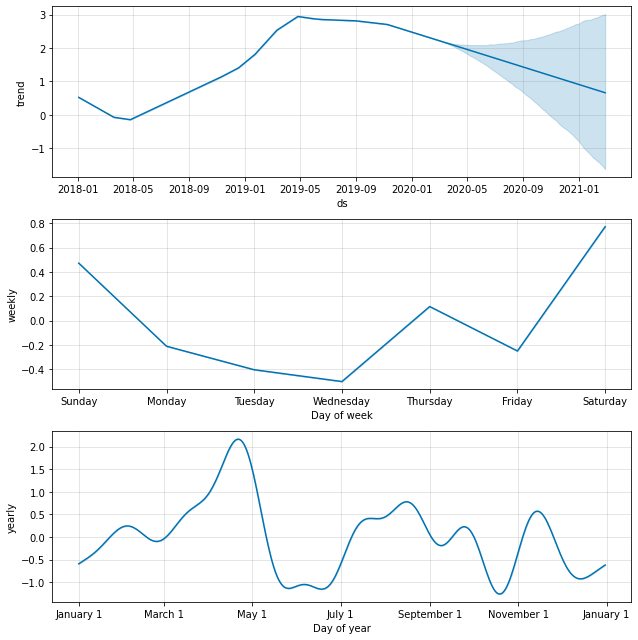

In [36]:
#Components of Forecast
forecast_postvty_retweets_plot_2 = m_postvty_retweets.plot_components(forecast_postvty_retweets)

## Forecast Like Data for Positivity Posts

In [37]:
#Create Data Frame for Like Data on Positivity Posts
postvty_like_df = postvty_df[["date", "likes"]]
postvty_like_df.sort_values(by=["likes"], ascending=False)

,date,likes
3173,2019-4-25,273.0
9733,2020-2-9,231.0
2971,2019-4-5,182.0
7764,2019-11-16,172.0
7543,2019-11-9,171.0
...,...,...
1278,2018-8-30,0.0
7945,2019-11-22,0.0
1185,2018-8-13,0.0
322,2018-4-8,0.0


In [38]:
#Postivity Likes DF Cleaned
postvty_like_df = postvty_like_df.rename(columns = {"date": "ds", "likes": "y"})
postvty_like_df.head()

,ds,y
1,2018-1-2,1.0
3,2018-1-3,0.0
5,2018-1-3,1.0
7,2018-1-4,4.0
9,2018-1-6,0.0


In [39]:
#Instantiate Prophet Class for Positivity-Likes
m_postvty_likes = Prophet(yearly_seasonality=True, changepoint_prior_scale=2)

In [40]:
#Train model on Like Data for Positivity
m_postvty_likes.fit(postvty_like_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#Generate 365 days into future for x-axis
future_postvty_likes = m_postvty_likes.make_future_dataframe(periods=365)
future_postvty_likes.tail()

,ds
2564,2021-02-24
2565,2021-02-25
2566,2021-02-26
2567,2021-02-27
2568,2021-02-28


In [42]:
#Predict Likes of Positivity Posts for 1 Year
forecast_postvty_likes = m_postvty_likes.predict(future_postvty_likes)
forecast_postvty_likes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2564,2021-02-24,3.185094,-127.977019,136.744826
2565,2021-02-25,5.057476,-134.195331,136.858527
2566,2021-02-26,3.897871,-130.967270,135.978254
2567,2021-02-27,8.366872,-123.491003,142.550513
2568,2021-02-28,5.472219,-127.993123,138.357565


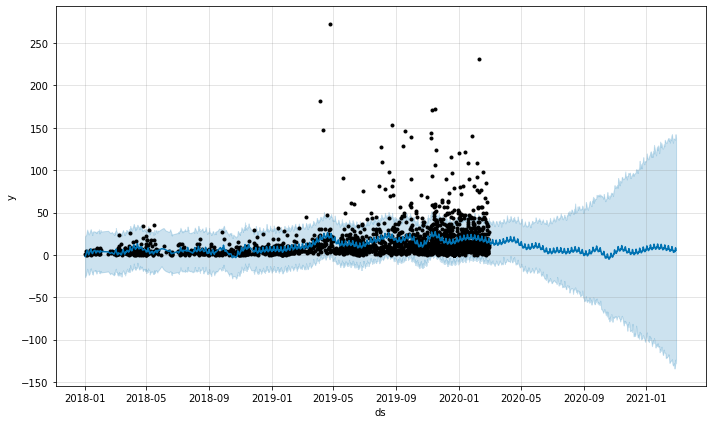

In [43]:
#Plot Forecast of Likes for Positivity Posts
forecast_postvty_likes_plot = m_postvty_likes.plot(forecast_postvty_likes)

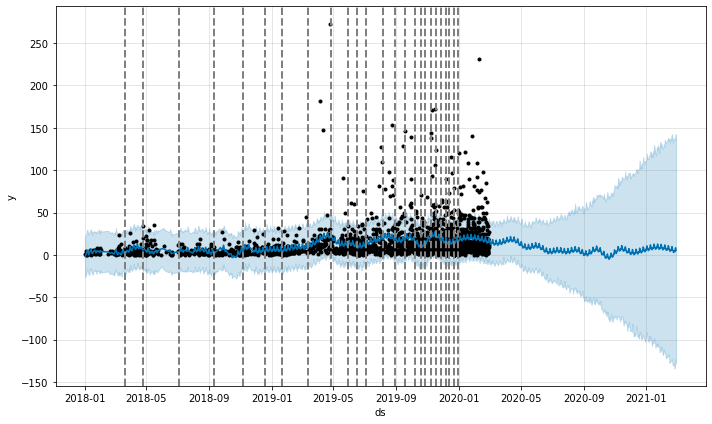

In [44]:
#Plot Changepoints
m_postvty_likes.plot(forecast_postvty_likes)
a = add_changepoints_to_plot(forecast_postvty_likes_plot.gca(), m_postvty_likes, forecast_postvty_likes)

for cp in m_postvty_likes.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

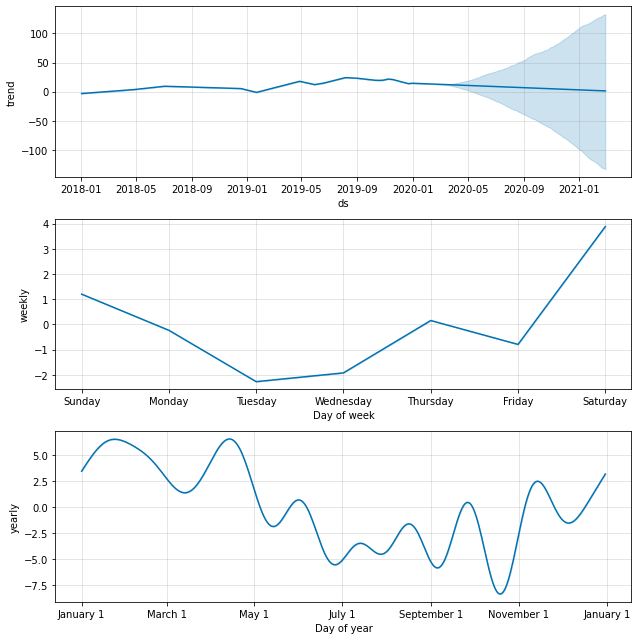

In [45]:
#Components of Forecast
forecast_postvty_likes_plot_2 = m_postvty_likes.plot_components(forecast_postvty_likes)

## Forecast Reply Data for Positivity Posts

In [46]:
#Create Data Frame for Like Data on Positivity Posts
postvty_replies_df = postvty_df[["date", "replies"]]
postvty_replies_df.sort_values(by=["replies"], ascending=False)

,date,replies
9463,2020-1-29,43.0
5093,2019-8-5,41.0
8386,2019-12-9,34.0
8234,2019-12-6,28.0
6407,2019-9-30,23.0
...,...,...
4341,2019-6-26,0.0
4338,2019-6-26,0.0
4331,2019-6-26,0.0
4315,2019-6-25,0.0


In [47]:
#Positivity Likes DF Cleaned
postvty_replies_df = postvty_replies_df.rename(columns = {"date": "ds", "replies": "y"})
postvty_replies_df.head()

,ds,y
1,2018-1-2,0.0
3,2018-1-3,0.0
5,2018-1-3,1.0
7,2018-1-4,1.0
9,2018-1-6,0.0


In [48]:
#Instantiate Prophet Class for Positivity-Likes
m_postvty_replies = Prophet(yearly_seasonality=True, changepoint_prior_scale=1)

In [49]:
#Train model on Like Data for Positivity
m_postvty_replies.fit(postvty_replies_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
#Generate 365 days into future for x-axis
future_postvty_replies = m_postvty_replies.make_future_dataframe(periods=365)
future_postvty_replies.tail()

,ds
2564,2021-02-24
2565,2021-02-25
2566,2021-02-26
2567,2021-02-27
2568,2021-02-28


In [51]:
#Predict Likes of Positivity Posts for 1 Year
forecast_postvty_replies = m_postvty_replies.predict(future_postvty_replies)
forecast_postvty_replies[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2564,2021-02-24,-1.239590,-5.040894,2.532162
2565,2021-02-25,-1.230986,-4.995998,2.536799
2566,2021-02-26,-1.060235,-4.658227,2.825025
2567,2021-02-27,-0.912202,-4.624675,2.575384
2568,2021-02-28,-1.308214,-4.947828,2.849519


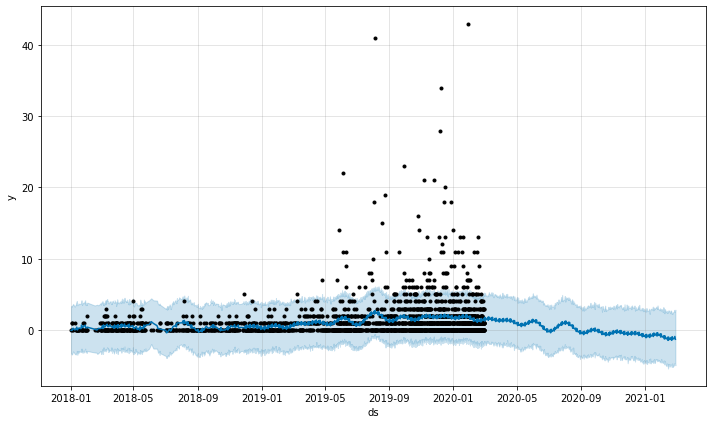

In [52]:
#Plot Forecast of Likes for Positivity Posts
forecast_postvty_replies_plot = m_postvty_replies.plot(forecast_postvty_replies)


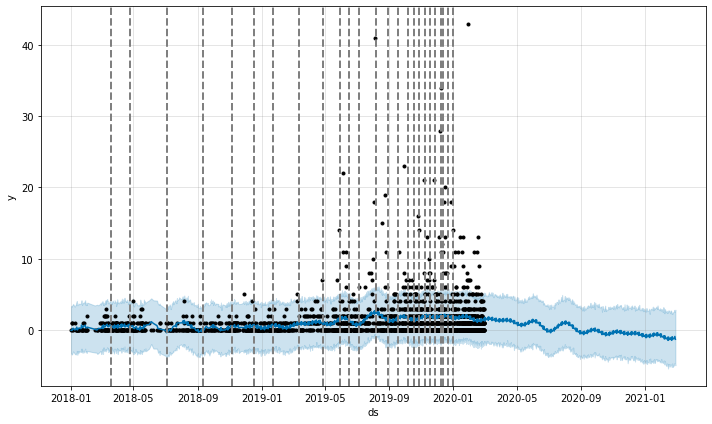

In [53]:
#Plot Changepoints
m_postvty_replies.plot(forecast_postvty_replies)
a = add_changepoints_to_plot(forecast_postvty_replies_plot.gca(), m_postvty_replies, forecast_postvty_replies)

for cp in m_postvty_replies.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

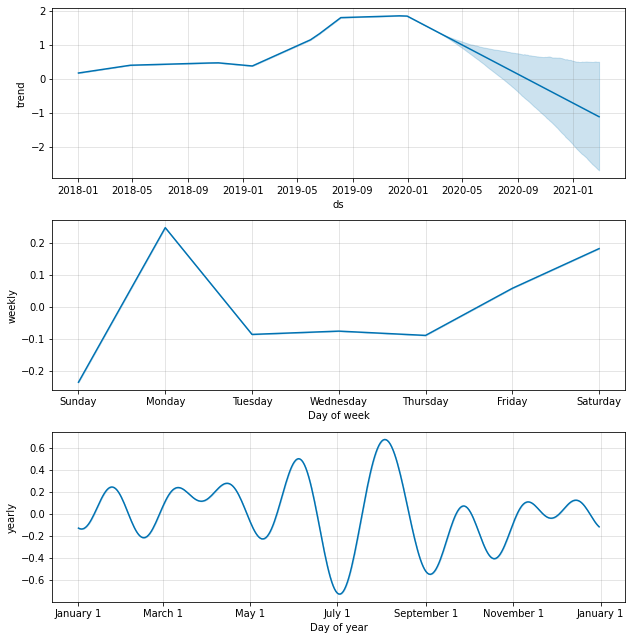

In [54]:
#Components of Forecast
forecast_postvty_replies_plot_2 = m_postvty_replies.plot_components(forecast_postvty_replies)